#  Merging

Better do it weekly to align dates

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#covid
df_covid = pd.read_csv('silver/covid_data.csv')
df_covid.head()

,state,country,lat,long,date,cases,new_cases
0,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0
1,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0
2,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0
3,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0
4,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0


In [3]:
df_covid.country.unique()

array(['Brazil', 'Chile', 'Colombia', 'Dominican Republic', 'Germany',
       'Italy', 'Mexico', 'Panama', 'US', 'Uruguay'], dtype=object)

In [4]:
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid['date_str'] = df_covid['date'].astype(str)

In [16]:
# Convert date column to datetime if not already
df_covid['date'] = pd.to_datetime(df_covid['date'])

# Get the start of the week (Monday) as a datetime object
df_covid['week'] = df_covid['date'].dt.to_period('W').apply(lambda x: x.start_time)

# Group by week and country
df_covid_weekly = df_covid.groupby(['week', 'country']).agg({'new_cases': 'sum', 'cases': 'sum'}).reset_index()

# Rename 'week' column to 'date' (keeping it as datetime)
df_covid_weekly.rename(columns={'week': 'date'}, inplace=True)


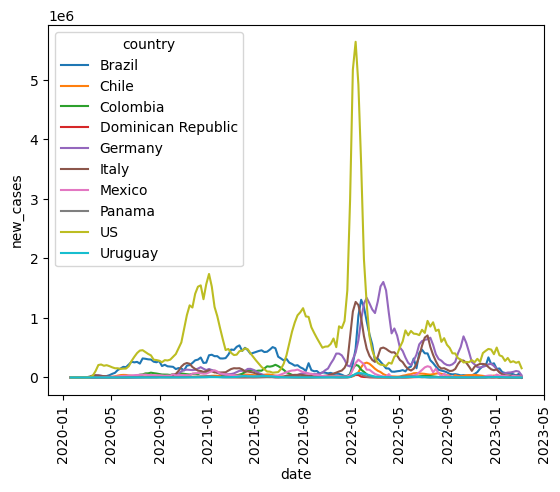

In [17]:
sns.lineplot(data = df_covid_weekly, x = 'date', y = 'new_cases', hue = 'country')
plt.xticks(rotation = 90)
plt.show()

In [18]:
df_atmos = pd.read_csv('silver/atmosferic_data.csv')
df_atmos.head()

,Date,Country,Specie,median
0,2022-03-28,BR,co,2.266667
1,2022-03-28,BR,dew,20.000000
2,2022-03-28,BR,humidity,81.000000
3,2022-03-28,BR,no2,6.066667
4,2022-03-28,BR,o3,15.866667


In [19]:
df_atmos['date'] = pd.to_datetime(df_atmos['Date'])
df_atmos['date_str'] = df_atmos['date'].astype(str)

In [20]:
dict_countries_2 = {'BR':'Brazil','CL':'Chile', 'CO':'Colombia', 'IT':'Italy',
                  'MX':'Mexico', 'PA':'Panama', 'US':'US', 'DE': 'Germany'}

In [21]:
# new countries atmospheric
new_countries = []
for i in range(len(df_atmos)):
    new_country = dict_countries_2[df_atmos['Country'][i]]
    new_countries.append(new_country)

df_atmos['country'] = new_countries

In [22]:
df_atmos

,Date,Country,Specie,median,date,date_str,country
0,2022-03-28,BR,co,2.266667,2022-03-28,2022-03-28,Brazil
1,2022-03-28,BR,dew,20.000000,2022-03-28,2022-03-28,Brazil
2,2022-03-28,BR,humidity,81.000000,2022-03-28,2022-03-28,Brazil
3,2022-03-28,BR,no2,6.066667,2022-03-28,2022-03-28,Brazil
4,2022-03-28,BR,o3,15.866667,2022-03-28,2022-03-28,Brazil
...,...,...,...,...,...,...,...
191548,2023-12-31,MX,pressure,1015.327273,2023-12-31,2023-12-31,Mexico
191549,2023-12-31,MX,so2,4.714286,2023-12-31,2023-12-31,Mexico
191550,2023-12-31,MX,temperature,13.700000,2023-12-31,2023-12-31,Mexico
191551,2023-12-31,MX,wind-gust,6.380000,2023-12-31,2023-12-31,Mexico


In [23]:
df_atmos_wide = pd.pivot_table(df_atmos, index=['date_str', 'country'], columns = ['Specie'], values = 'median').reset_index()
df_atmos_wide.head()

Specie,date_str,country,co,d,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,uvi,wd,wind gust,wind speed,wind-gust,wind-speed
0,2014-12-29,Brazil,5.50,NaN,NaN,NaN,12.400000,19.700000,20.500000,50.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-29,Chile,7.22,NaN,NaN,NaN,6.200000,15.600000,25.400000,34.636364,NaN,NaN,2.825000,NaN,4.3,NaN,NaN,NaN,NaN,NaN
2,2014-12-29,Colombia,5.10,NaN,NaN,NaN,6.500000,4.200000,29.000000,50.000000,NaN,NaN,0.800000,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
3,2014-12-29,Germany,1.15,NaN,NaN,NaN,14.553333,9.453846,17.933333,44.500000,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-29,Italy,0.10,NaN,NaN,NaN,32.583333,12.433333,18.571429,72.250000,NaN,NaN,2.466667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# see nans by column for df_atmos_wide
df_atmos_wide.isnull().sum()

Specie
date_str             0
country              0
co                  37
d                16847
dew               5381
humidity          4867
no2                 48
o3                  39
pm10                18
pm25               139
precipitation    13670
pressure          4874
so2                 54
temperature       4865
uvi              16197
wd               13249
wind gust        16288
wind speed       16274
wind-gust         6227
wind-speed        5526
dtype: int64

In [25]:
df_atmos_wide['date'] = pd.to_datetime(df_atmos_wide['date_str'])

In [26]:
# filter for 2020 onwards
df_atmos_wide_2020 = df_atmos_wide[df_atmos_wide['date_str'] >= '2020-01-01']

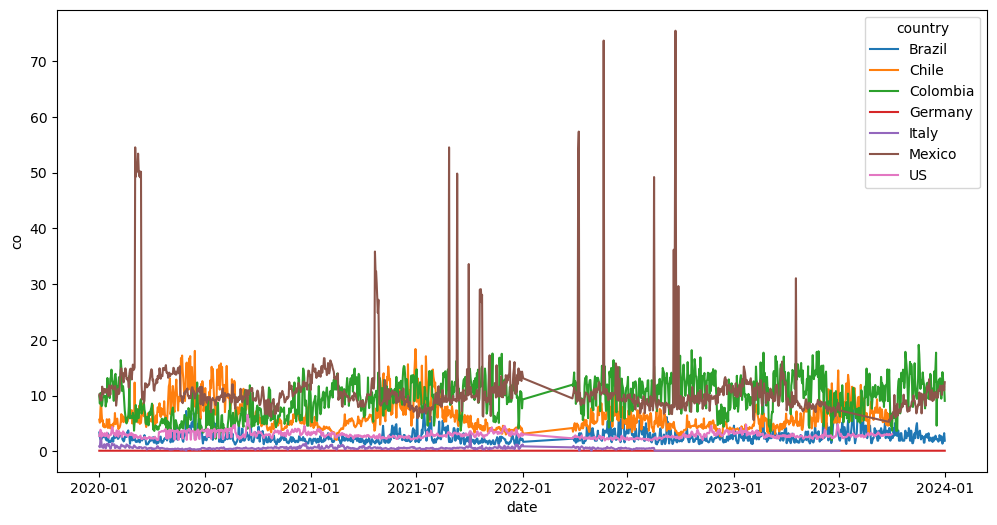

In [27]:
# plot co, no2, o3, pm10, pm25, so2
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_atmos_wide_2020, x='date', y='co', hue='country')
plt.show()

In [28]:
df_atmos_wide.columns

Index(['date_str', 'country', 'co', 'd', 'dew', 'humidity', 'no2', 'o3',
       'pm10', 'pm25', 'precipitation', 'pressure', 'so2', 'temperature',
       'uvi', 'wd', 'wind gust', 'wind speed', 'wind-gust', 'wind-speed',
       'date'],
      dtype='object', name='Specie')

In [30]:

# Ensure 'date' is in datetime format
df_atmos_wide['date'] = pd.to_datetime(df_atmos_wide['date'])

# Sort by country and date for proper interpolation
df_atmos_wide = df_atmos_wide.sort_values(by=['country', 'date'])

# List of pollutant columns to process
pollutants = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

# Interpolate NaNs within each country using linear interpolation
df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.interpolate(method='linear'))

# Fill remaining NaNs using forward-fill then backward-fill within each country
df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Check if any NaNs remain
print("Remaining NaNs:\n", df_atmos_wide[pollutants].isna().sum())

# Create a 'week' column representing the start of the week (Monday)
df_atmos_wide['week'] = df_atmos_wide['date'].dt.to_period('W').apply(lambda x: x.start_time)

# Group by 'week' and 'country' and aggregate only pollutants (mean)
df_atmos_wide_w = df_atmos_wide.groupby(['week', 'country'])[pollutants].mean().reset_index()

# Rename 'week' column to 'date' (keeping it as datetime)
df_atmos_wide_w.rename(columns={'week': 'date'}, inplace=True)

# Display result
df_atmos_wide_w.head()


C:\Users\danie\AppData\Local\Temp\ipykernel_31968\1340473643.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\danie\AppData\Local\Temp\ipykernel_31968\1340473643.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


Remaining NaNs:
 Specie
co      0
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64


Specie,date,country,co,no2,o3,pm10,pm25,so2
0,2014-12-29,Brazil,4.728571,8.121429,19.042857,15.000000,38.285714,1.100000
1,2014-12-29,Chile,7.282857,6.842857,14.666667,27.275325,38.727273,4.270238
2,2014-12-29,Colombia,4.785714,4.700000,5.628571,25.285714,42.857143,0.571429
3,2014-12-29,Germany,0.867347,12.622857,12.467949,22.666667,53.642857,5.109911
4,2014-12-29,Italy,0.100000,25.773810,12.275000,28.602041,91.182823,1.954762


<Axes: xlabel='date', ylabel='pm10'>

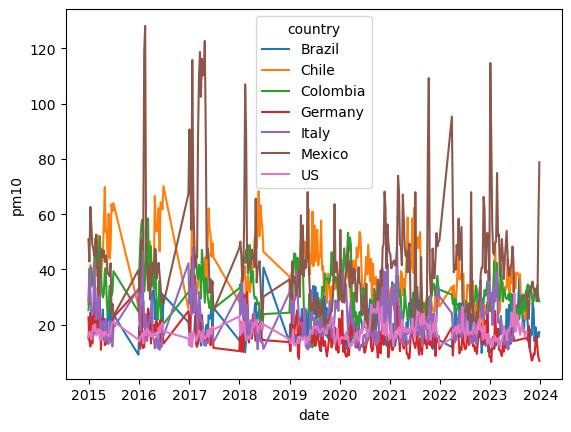

In [31]:
sns.lineplot(data=df_atmos_wide_w, x='date', y='pm10', hue='country')

In [32]:
df_atmos_wide_w.isnull().sum()

Specie
date       0
country    0
co         0
no2        0
o3         0
pm10       0
pm25       0
so2        0
dtype: int64

In [33]:
df_population = pd.read_csv('silver/un_population.csv')
df_population.head()

,country,year,population
0,World,2020,7851414621
1,World,2021,7922587963
2,World,2022,7986308820
3,World,2023,8056505564
4,Sub-Saharan Africa,2020,1110090241


In [34]:
df_population['country'] = df_population['country'].str.replace('United States of America', 'US')

# Merge

In [35]:
df_merge0 = df_covid_weekly.merge(df_atmos_wide_w, how ='left', on=['date', 'country'])
df_merge0.head()

,date,country,new_cases,cases,co,no2,o3,pm10,pm25,so2
0,2020-01-20,Brazil,0,0,2.057143,5.461905,13.395238,13.490476,26.204762,1.452381
1,2020-01-20,Chile,0,0,4.511905,4.730952,14.030952,34.779221,38.677489,4.166667
2,2020-01-20,Colombia,0,0,12.250000,10.550000,3.528571,36.285714,59.571429,0.800000
3,2020-01-20,Dominican Republic,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-20,Germany,0,0,0.100000,17.421429,5.700000,25.084034,64.587302,1.508532


In [36]:
df_merge0.isnull().sum()

date           0
country        0
new_cases      0
cases          0
co           576
no2          576
o3           576
pm10         576
pm25         576
so2          576
dtype: int64

In [44]:
# fill nans in df_merge0 interpolating
# Sort by country and date to ensure proper interpolation
df_merge0 = df_merge0.sort_values(by=['country', 'date'])

# List of pollutant columns to interpolate
pollutant_cols = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

# Interpolate NaNs within each country
df_merge0[pollutant_cols] = df_merge0.groupby('country')[pollutant_cols].transform(lambda x: x.interpolate(method='linear'))

# Fill any remaining NaNs using forward-fill and backward-fill within each country
df_merge0[pollutant_cols] = df_merge0.groupby('country')[pollutant_cols].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Check if any NaNs remain
print(df_merge0[pollutant_cols].isna().sum())

co      492
no2     492
o3      492
pm10    492
pm25    492
so2     492
dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_31968\1718340747.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merge0[pollutant_cols] = df_merge0.groupby('country')[pollutant_cols].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\danie\AppData\Local\Temp\ipykernel_31968\1718340747.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merge0[pollutant_cols] = df_merge0.groupby('country')[pollutant_cols].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


<Axes: xlabel='date', ylabel='pm10'>

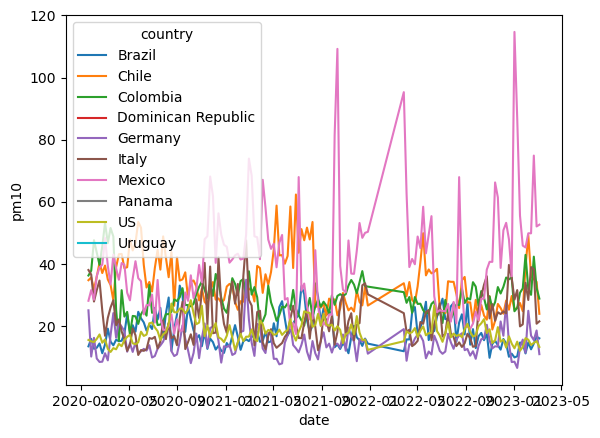

In [46]:
sns.lineplot(data=df_merge0, x='date', y='pm10', hue='country')

In [54]:
nan_counts_by_country = df_merge0.groupby('country').apply(lambda x: x.isna().sum().sum())
print(nan_counts_by_country)

country
Brazil                  0
Chile                   0
Colombia                0
Dominican Republic    984
Germany                 0
Italy                   0
Mexico                  0
Panama                984
US                      0
Uruguay               984
dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_31968\942221998.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_counts_by_country = df_merge0.groupby('country').apply(lambda x: x.isna().sum().sum())


In [57]:
# drop countries where there are more than 10% of nans
countries_to_drop = nan_counts_by_country[nan_counts_by_country > 0.1*len(df_merge0)].index
df_merge0 = df_merge0[~df_merge0['country'].isin(countries_to_drop)]
df_merge0['country'].unique()

array(['Brazil', 'Chile', 'Colombia', 'Germany', 'Italy', 'Mexico', 'US'],
      dtype=object)

In [58]:
df_merge0['year'] = df_merge0['date'].dt.year

In [59]:
df_merge2 = df_merge0.merge(df_population, how ='left', on=['country', 'year'])

In [60]:
df_merge_final = df_merge2.copy()

In [61]:
df_merge_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1148 non-null   datetime64[ns]
 1   country     1148 non-null   object        
 2   new_cases   1148 non-null   int64         
 3   cases       1148 non-null   int64         
 4   co          1148 non-null   float64       
 5   no2         1148 non-null   float64       
 6   o3          1148 non-null   float64       
 7   pm10        1148 non-null   float64       
 8   pm25        1148 non-null   float64       
 9   so2         1148 non-null   float64       
 10  year        1148 non-null   int32         
 11  population  1148 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(3), object(1)
memory usage: 103.3+ KB


In [63]:
df_merge_final.drop(columns = ['year'], inplace = True)

In [64]:
import os

# Specify the directory path
directory_path = 'gold'

# Create the directory if it does not exist
os.makedirs(directory_path, exist_ok=True)

df_merge_final.to_csv('gold/covid_multivariate_w.csv', index = False)